###  import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from tensorflow.keras.optimizers import Adam
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

### analyse and prepare dataset

In [2]:
data = pd.read_csv("admissions_data.csv")
print(data.shape)
data.head()


(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# removing Serial No columns
data = data.drop(data.columns[0],axis=1)

In [5]:
# seperate data into labels and features
labels = data.iloc[:,-1]
features = data.iloc[:,0:-1]
features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


### create train and test data


In [6]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.2,random_state=5)

In [7]:
#create scaler
numerical_features = features_train.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_features.columns
 
ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

In [8]:
# scale data
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)


### create model

In [9]:
def des_mode(features):
    #input
    model = Sequential()
    num_features = features.shape[1]
    input = layers.InputLayer(input_shape =(num_features,))
    model.add(input)
    
#     hidden layers
    model.add(layers.Dense(128,activation = "relu"))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64,activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(32,activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8,activation = "relu"))
#     output
    model.add(layers.Dense(1))
#     learning rate
    opt = Adam(learning_rate =0.01)
    model.compile(loss='mse',  metrics=['mae'], optimizer=opt)
    return model
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [10]:
model = des_mode(features)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2

In [11]:
answer =model.fit(features_train_scaled,labels_train.to_numpy(),epochs=50,batch_size = 4 ,verbose = 1,validation_split=0.3,callbacks = [stop])

Epoch 1/50
70/70 [==============================] - 0s 4ms/step - loss: 0.0990 - mae: 0.2331 - val_loss: 0.0106 - val_mae: 0.0864
Epoch 2/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0898 - val_loss: 0.0071 - val_mae: 0.0731
Epoch 3/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0091 - mae: 0.0750 - val_loss: 0.0050 - val_mae: 0.0545
Epoch 4/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0069 - mae: 0.0640 - val_loss: 0.0075 - val_mae: 0.0758
Epoch 5/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0067 - mae: 0.0649 - val_loss: 0.0049 - val_mae: 0.0493
Epoch 6/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0088 - mae: 0.0739 - val_loss: 0.0071 - val_mae: 0.0657
Epoch 7/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0059 - mae: 0.0590 - val_loss: 0.0052 - val_mae: 0.0543
Epoch 8/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0065 - mae: 0.06

In [12]:
val_mse, val_mae = model.evaluate(features_test_scaled,labels_test.to_numpy(),verbose=0)
val_mae

0.050429221242666245

In [13]:
predicted_values = model.predict(features_test_scaled) 
print(r2_score(labels_test, predicted_values)) 


0.7623111830128674


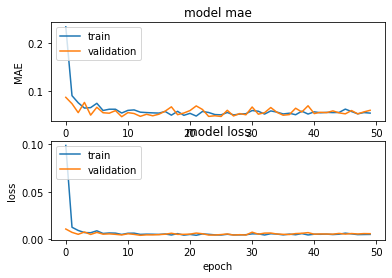

In [14]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(answer.history['mae'])
ax1.plot(answer.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(answer.history['loss'])
ax2.plot(answer.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()